In [1]:
### Please ignore the warning messages due to duplicate methods
library(readxl)
library(dplyr)
library(lubridate)
library(ggplot2)
library(tseries)
library(forecast)
library(TTR)
library(zoo)
library(xts)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Attaching package: 'xts'

The following objects are masked from 'package:dplyr':

    first, last



In [3]:
airquality<-read_excel("C:\\Users\\poonam\\Downloads\\AirQualityUCI\\AirQualityUCI.xlsx")
head(airquality)

Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
2004-03-10,1899-12-31 18:00:00,2.6,1360.00,150,11.881723,1045.50,166,1056.25,113,1692.00,1267.50,13.600,48.875,0.7577538
2004-03-10,1899-12-31 19:00:00,2.0,1292.25,112,9.397165,954.75,103,1173.75,92,1558.75,972.25,13.300,47.700,0.7254874
2004-03-10,1899-12-31 20:00:00,2.2,1402.00,88,8.997817,939.25,131,1140.00,114,1554.50,1074.00,11.900,53.975,0.7502391
2004-03-10,1899-12-31 21:00:00,2.2,1375.50,80,9.228796,948.25,172,1092.00,122,1583.75,1203.25,11.000,60.000,0.7867125
2004-03-10,1899-12-31 22:00:00,1.6,1272.25,51,6.518224,835.50,131,1205.00,116,1490.00,1110.00,11.150,59.575,0.7887942
2004-03-10,1899-12-31 23:00:00,1.2,1197.00,38,4.741012,750.25,89,1336.50,96,1393.00,949.25,11.175,59.175,0.7847717


In [4]:
### add the data to dataframe for manipulation
a<-data.frame(airquality)

In [5]:
### Selecled the few columns(date, time and co) from the data frame 
df_co<-select(a,Date,Time,CO.GT.,NMHC.GT., NOx.GT.,NO2.GT.,'T',AH)
testdata <- df_co

In [9]:
### manipulation of time columns( chose hour)
testdata1 <- mutate(testdata, Time = hour(testdata$Time))
testdata2 <- mutate(testdata1, date2 = update(testdata1$Date,hour = testdata1$Time))
head(testdata2)

Date,Time,CO.GT.,NMHC.GT.,NOx.GT.,NO2.GT.,T,AH,date2
2004-03-10,18,2.6,150,166,113,13.600,0.7577538,2004-03-10 18:00:00
2004-03-10,19,2.0,112,103,92,13.300,0.7254874,2004-03-10 19:00:00
2004-03-10,20,2.2,88,131,114,11.900,0.7502391,2004-03-10 20:00:00
2004-03-10,21,2.2,80,172,122,11.000,0.7867125,2004-03-10 21:00:00
2004-03-10,22,1.6,51,131,116,11.150,0.7887942,2004-03-10 22:00:00
2004-03-10,23,1.2,38,89,96,11.175,0.7847717,2004-03-10 23:00:00


In [11]:
### replace the missing value with NA
cleanedset1 <- select(testdata2, date2, CO.GT.,NMHC.GT., NOx.GT.,NO2.GT.,'T',AH)
cleanedset1[cleanedset1 == -200] <- NA
head(cleanedset1)

date2,CO.GT.,NMHC.GT.,NOx.GT.,NO2.GT.,T,AH
2004-03-10 18:00:00,2.6,150,166,113,13.600,0.7577538
2004-03-10 19:00:00,2.0,112,103,92,13.300,0.7254874
2004-03-10 20:00:00,2.2,88,131,114,11.900,0.7502391
2004-03-10 21:00:00,2.2,80,172,122,11.000,0.7867125
2004-03-10 22:00:00,1.6,51,131,116,11.150,0.7887942
2004-03-10 23:00:00,1.2,38,89,96,11.175,0.7847717


In [12]:
### replace the missing value with zoo fill extent 
j <- data.frame (cleanedset1$date2 ,na.fill(zoo(select(cleanedset1,CO.GT.)), "extend"), na.fill(zoo(select(cleanedset1,NMHC.GT.)), "extend"), na.fill(zoo(select(cleanedset1,NOx.GT.)), "extend"),na.fill(zoo(select(cleanedset1,NO2.GT.)), "extend"),na.fill(zoo(select(cleanedset1,'T')), "extend"),na.fill(zoo(select(cleanedset1,AH)), "extend") )

In [13]:
### change the column name
names(j)[1] <- "Date"
names(j)[2] <- "CO"
names(j)[3] <- "NMHC"
names(j)[4] <- "NOx"
names(j)[5] <- "NO2"

k <-select(j,'CO','NOx','NO2','T','AH')

summary(k)

       CO              NOx              NO2              T        
 Min.   : 0.100   Min.   :   2.0   Min.   :  2.0   Min.   :-1.90  
 1st Qu.: 1.100   1st Qu.:  96.0   1st Qu.: 76.0   1st Qu.:11.72  
 Median : 1.800   Median : 180.0   Median :104.8   Median :17.57  
 Mean   : 2.131   Mean   : 241.9   Mean   :109.6   Mean   :18.23  
 3rd Qu.: 2.900   3rd Qu.: 326.0   3rd Qu.:136.4   3rd Qu.:24.27  
 Max.   :11.900   Max.   :1479.0   Max.   :339.7   Max.   :44.60  
       AH        
 Min.   :0.1847  
 1st Qu.:0.7323  
 Median :0.9895  
 Mean   :1.0196  
 3rd Qu.:1.3067  
 Max.   :2.2310  

In [14]:
### convert the dataset to time series 
series<-ts(k,start=c(2014),frequency = 8760)

In [16]:
### basic time series commands
start(series)
end(series)

[1] 2014    1

[1] 2015  597

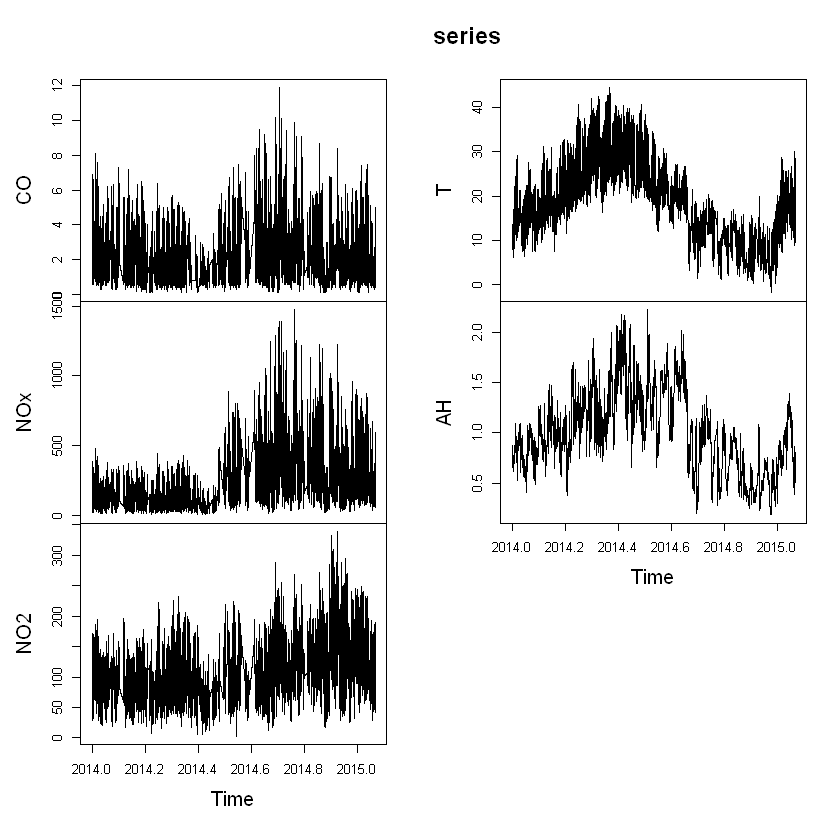

In [17]:
### plot the time series
plot(series)

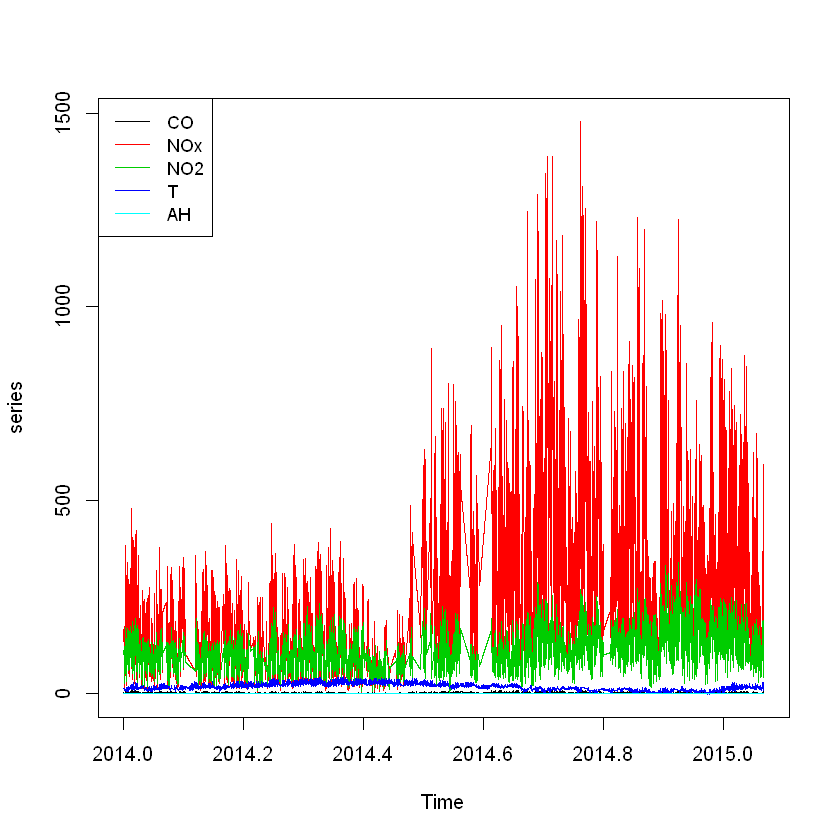

In [18]:
plot(series,plot.type="single",col=1:5)
legend("topleft",legend=colnames(series),lty = 1,col = 1:5,cex = .9)

[1] 1

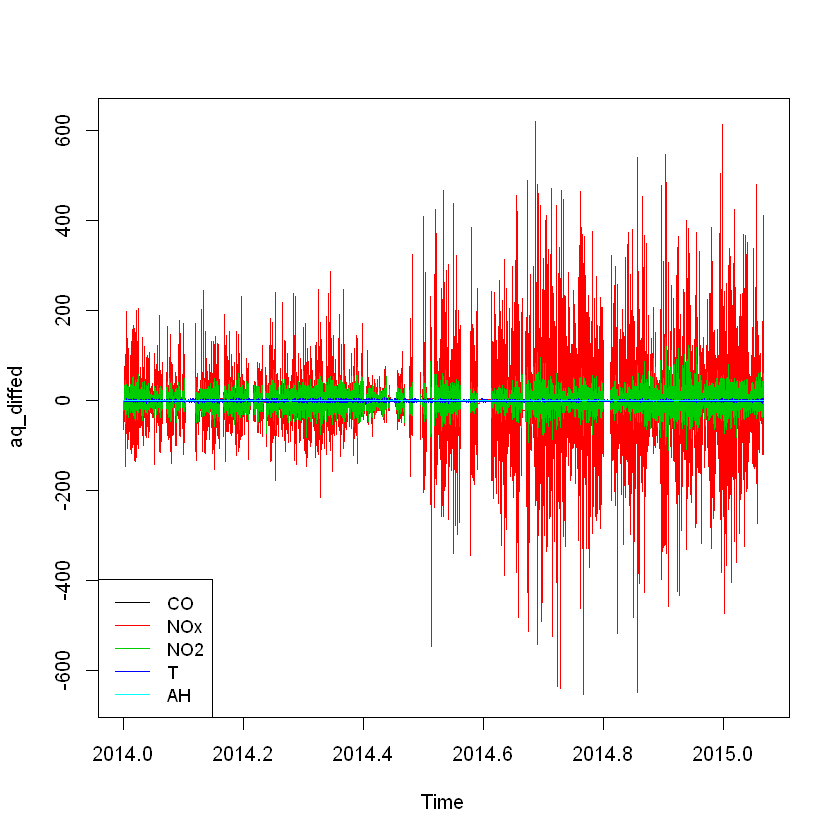

In [19]:
### check the number of differences and make the data stationary and plot 
numdiffs<-ndiffs(series)
numdiffs
aq_diffed <- diff(series, differences = numdiffs)

plot(aq_diffed,plot.type = "single", col=1:5)
legend("bottomleft",legend=colnames(aq_diffed),lty = 1,col = 1:5,cex = .9)


In [20]:
### Vector autoregression model(VAR)
require(vars)
aq_var <- VAR(aq_diffed,lag.max = 2)
aq_var
summary(aq_var)

Loading required package: vars
Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select

Loading required package: strucchange
Loading required package: sandwich
Loading required package: urca
Loading required package: lmtest



VAR Estimation Results:

Estimated coefficients for equation CO: 
Call:
CO = CO.l1 + NOx.l1 + NO2.l1 + T.l1 + AH.l1 + CO.l2 + NOx.l2 + NO2.l2 + T.l2 + AH.l2 + const 

        CO.l1        NOx.l1        NO2.l1          T.l1         AH.l1 
 1.098510e-01  1.016529e-03  3.087380e-03 -3.766528e-02 -1.987292e-01 
        CO.l2        NOx.l2        NO2.l2          T.l2         AH.l2 
-2.925471e-01  4.655871e-04  3.343114e-03  3.768547e-02 -3.766024e-01 
        const 
-7.341109e-05 


Estimated coefficients for equation NOx: 
Call:
NOx = CO.l1 + NOx.l1 + NO2.l1 + T.l1 + AH.l1 + CO.l2 + NOx.l2 + NO2.l2 + T.l2 + AH.l2 + const 

       CO.l1       NOx.l1       NO2.l1         T.l1        AH.l1        CO.l2 
 11.15529740   0.11517501   0.19814804  -4.99530978 -46.90182438 -12.56494678 
      NOx.l2       NO2.l2         T.l2        AH.l2        const 
 -0.02590791   0.17428151   1.99308011 -44.61684341   0.01376281 


Estimated coefficients for equation NO2: 
Call:
NO2 = CO.l1 + NOx.l1 + NO2.l1 + 


VAR Estimation Results:
Endogenous variables: CO, NOx, NO2, T, AH 
Deterministic variables: const 
Sample size: 9354 
Log Likelihood: -94603.021 
Roots of the characteristic polynomial:
0.6516 0.4832 0.4832 0.3246 0.3246 0.2513 0.2513 0.2312 0.2312 0.198
Call:
VAR(y = aq_diffed, lag.max = 2)


Estimation results for equation CO: 
CO = CO.l1 + NOx.l1 + NO2.l1 + T.l1 + AH.l1 + CO.l2 + NOx.l2 + NO2.l2 + T.l2 + AH.l2 + const 

         Estimate Std. Error t value Pr(>|t|)    
CO.l1   1.099e-01  1.707e-02   6.437 1.28e-10 ***
NOx.l1  1.017e-03  1.745e-04   5.826 5.85e-09 ***
NO2.l1  3.087e-03  6.046e-04   5.106 3.35e-07 ***
T.l1   -3.767e-02  6.502e-03  -5.793 7.13e-09 ***
AH.l1  -1.987e-01  1.619e-01  -1.227  0.21979    
CO.l2  -2.925e-01  1.702e-02 -17.184  < 2e-16 ***
NOx.l2  4.656e-04  1.742e-04   2.673  0.00753 ** 
NO2.l2  3.343e-03  6.039e-04   5.536 3.17e-08 ***
T.l2    3.769e-02  6.500e-03   5.798 6.95e-09 ***
AH.l2  -3.766e-01  1.617e-01  -2.329  0.01990 *  
const  -7.341e-05  7.2

AIC(n) 
     2

[1] "CO"  "NOx" "NO2" "T"   "AH"

[1] "lm"

Loading required package: coefplot
Registered S3 methods overwritten by 'useful':
  method       from    
  autoplot.acf forecast
  fortify.ts   forecast


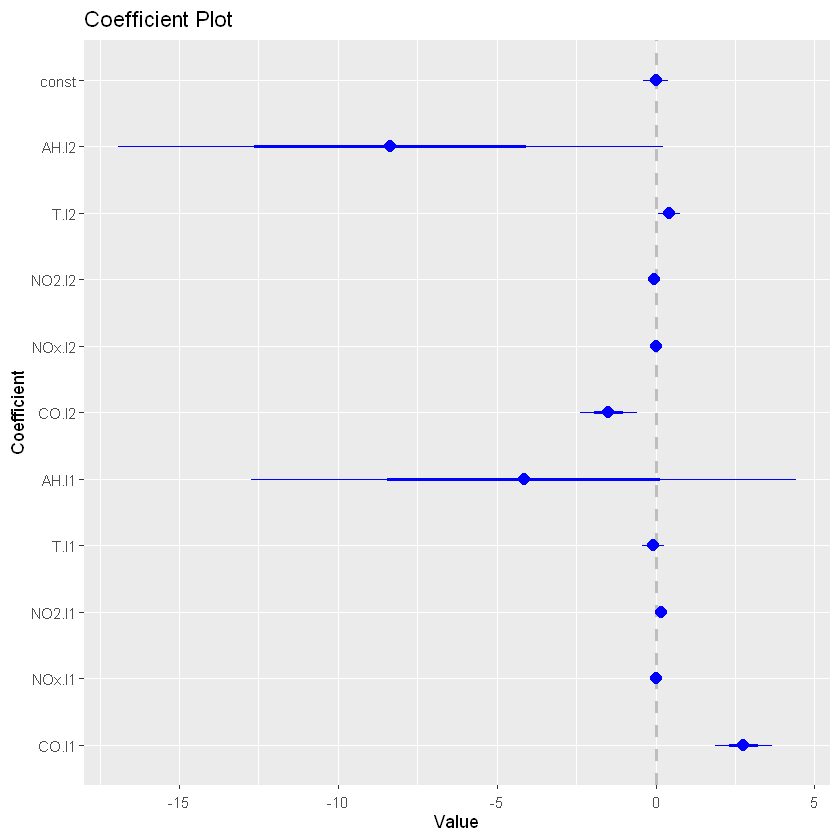

In [22]:
### cofficient plot
aq_var$p
names(aq_var$varresult)
class(aq_var$varresult$NO2)
require(coefplot)
coefplot(aq_var$varresult$NO2)

In [24]:
# prediction of model
predict(aq_var,n.ahead = 5)

$CO
            fcst     lower    upper       CI
[1,]  0.17323128 -1.203277 1.549740 1.376508
[2,]  0.07926983 -1.354030 1.512569 1.433300
[3,] -0.01489282 -1.468137 1.438351 1.453244
[4,] -0.01943841 -1.476526 1.437649 1.457088
[5,]  0.00195783 -1.455887 1.459803 1.457845

$NOx
           fcst     lower    upper       CI
[1,] 17.1581354 -142.9706 177.2869 160.1287
[2,]  4.5831319 -160.3246 169.4908 164.9077
[3,] -1.2423659 -166.5613 164.0766 165.3189
[4,] -1.6711240 -167.2137 163.8714 165.5425
[5,] -0.3390379 -165.8951 165.2170 165.5561

$NO2
            fcst     lower    upper       CI
[1,]  4.56789253 -31.92826 41.06404 36.49615
[2,]  1.30086655 -36.54222 39.14395 37.84309
[3,]  0.23094838 -37.69025 38.15215 37.92120
[4,] -0.08604653 -38.02937 37.85728 37.94333
[5,] -0.02415756 -37.97147 37.92316 37.94732

$T
           fcst     lower    upper       CI
[1,] 0.14401167 -2.079799 2.367823 2.223811
[2,] 0.16381033 -2.317836 2.645457 2.481647
[3,] 0.13765385 -2.484563 2.759871 2.622217


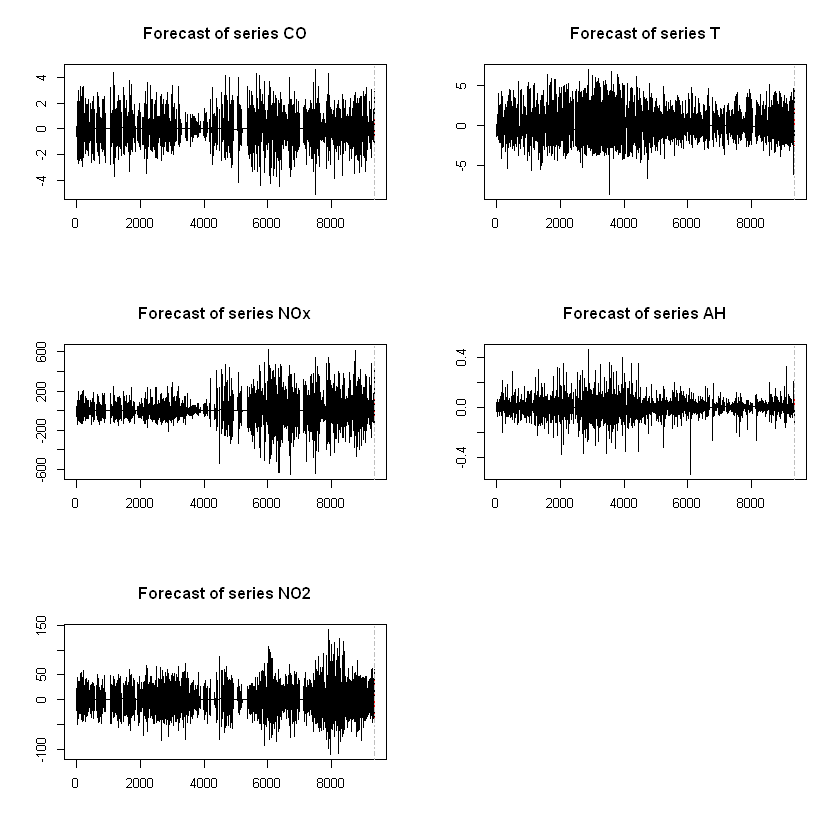

In [25]:
plot(predict(aq_var,n.ahead = 10))

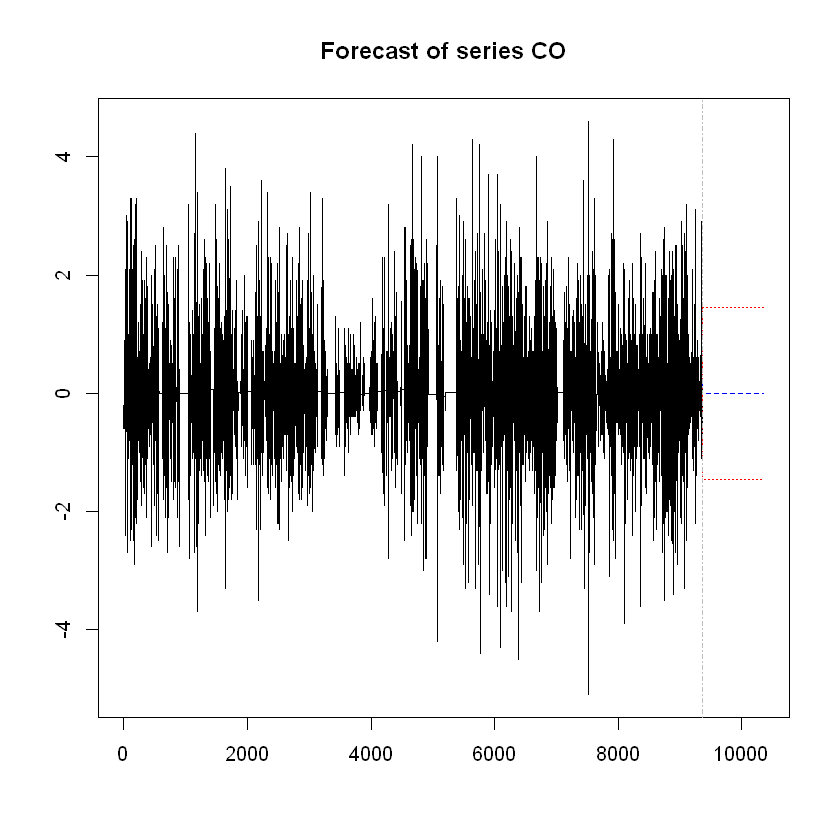

In [26]:
prediction<-predict(aq_var,n.ahead = 1000,ci=0.95)
plot(prediction, names="CO")